## Exploring and Processing Weather Data
#### Sep 25, 2025


In [235]:
import pandas as pd
import matplotlib.pyplot as plt

In [237]:
game_logs = pd.read_csv("../data/final_game_logs.csv")

In [239]:
game_logs.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'game_id', 'home_name', 'away_name',
       'home_probable_pitcher', 'away_probable_pitcher', 'away_score',
       'home_score', 'home_ERA', 'home_ER', 'home_R', 'home_SO', 'home_BB',
       'home_SO/BB', 'home_WHIP', 'away_ERA', 'away_ER', 'away_R', 'away_SO',
       'away_BB', 'away_SO/BB', 'away_WHIP', 'home_OBP', 'home_SLG', 'home_HR',
       'home_R/G', 'home_BB_batting', 'home_SO_batting', 'home_IBB',
       'away_home_OBP', 'away_home_SLG', 'away_home_HR', 'away_home_R/G',
       'away_home_BB_batting', 'away_home_SO_batting', 'away_home_IBB', 'temp',
       'condition', 'wind'],
      dtype='object')

#### Converting "Wind" Column to Numbers

In [242]:
game_logs["wind"] = game_logs["wind"].str.extract(r"(\d+)").astype(float)

#### Missing values

19 Missing values were found. For the missing values, I filled them with the following :
* Temp : Average Temperature
* Condition = 7 "Unknown"
* Wind : Average Wind Speed

In [245]:
game_logs[['temp', 'condition', 'wind']].isna().sum()

temp         19
condition    19
wind         19
dtype: int64

In [247]:
game_logs["temp"].fillna(game_logs["temp"].mean(), inplace=True)
game_logs["condition"].fillna("Unknown", inplace=True)
game_logs["wind"].fillna(game_logs["wind"].mean(), inplace=True)

/var/folders/k2/hmwmh0zn7_39kx03c2fbhh500000gn/T/ipykernel_43845/1505236623.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  game_logs["temp"].fillna(game_logs["temp"].mean(), inplace=True)
/var/folders/k2/hmwmh0zn7_39kx03c2fbhh500000gn/T/ipykernel_43845/1505236623.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [249]:
game_logs[['temp', 'condition', 'wind']].isna().sum()

temp         0
condition    0
wind         0
dtype: int64

#### Distribution Plot of the Weather Data

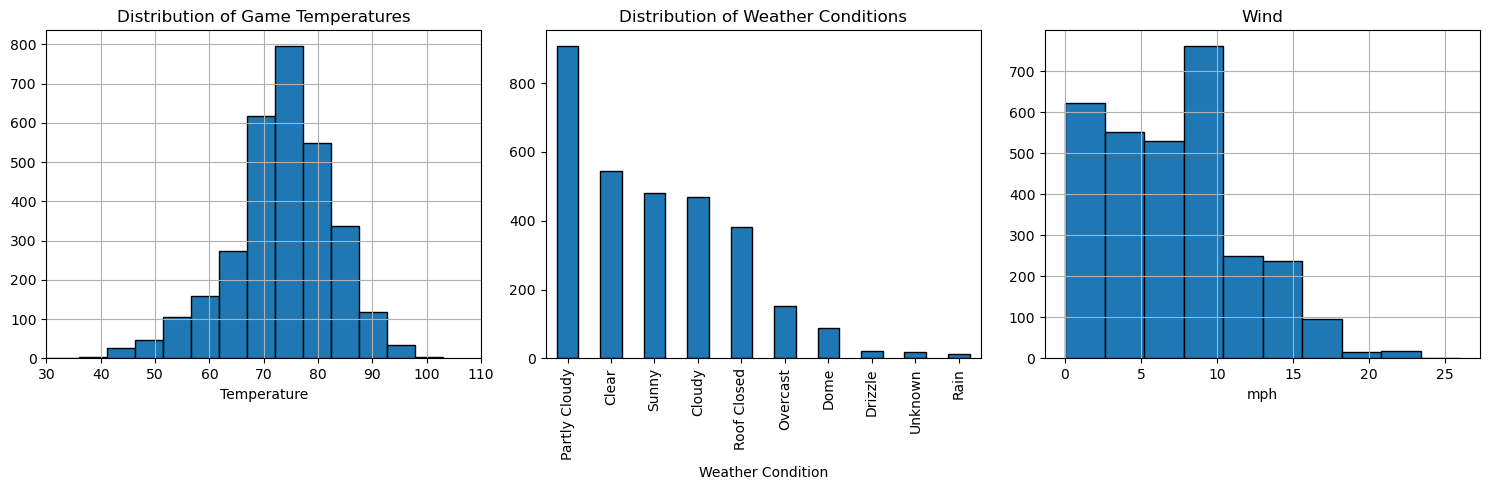

In [252]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

game_logs['temp'].hist(ax=axes[0], bins=20, edgecolor='black')
axes[0].set_xlabel("Temperature")
axes[0].set_title("Distribution of Game Temperatures")
axes[0].set_xlim(30, 110)  # example temp range
axes[0].set_xticks(range(30, 111, 10))

game_logs['condition'].value_counts().plot(kind='bar', ax=axes[1], edgecolor='black')
axes[1].set_xlabel("Weather Condition")
axes[1].set_title("Distribution of Weather Conditions")
#axes[1].tick_params(axis='x', rotation=45)  # rotate labels if text overlaps

game_logs['wind'].hist(ax=axes[2], edgecolor='black')
axes[2].set_xlabel("mph")
axes[2].set_title("Wind")

plt.tight_layout()
plt.show()

#### Mapping Condition States to Numerical Values

In [254]:
condition_map = {
    "Partly Cloudy": 0,
    "Clear": 1,
    "Sunny": 2,
    "Cloudy": 3,
    "Roof Closed": 4,
    "Overcast": 5,
    "Dome": 6,
    "Drizzle": 7,
    "Unknown": 8,
    "Rain": 9
}
game_logs["condition_code"] = game_logs["condition"].map(condition_map)

In [256]:
game_logs['condition'].value_counts()

condition
Partly Cloudy    908
Clear            545
Sunny            481
Cloudy           469
Roof Closed      381
Overcast         152
Dome              89
Drizzle           21
Unknown           20
Rain              14
Name: count, dtype: int64

In [258]:
game_logs['condition_code'].value_counts()

condition_code
0    908
1    545
2    481
3    469
4    381
5    152
6     89
7     21
8     20
9     14
Name: count, dtype: int64

In [260]:
game_logs.head()

,Unnamed: 0.1,Unnamed: 0,game_id,home_name,away_name,home_probable_pitcher,away_probable_pitcher,away_score,home_score,home_ERA,...,away_home_SLG,away_home_HR,away_home_R/G,away_home_BB_batting,away_home_SO_batting,away_home_IBB,temp,condition,wind,condition_code
0,0,0,748266,San Diego Padres,Los Angeles Dodgers,Joe Musgrove,Gavin Stone,14,1,3.88,...,0.446,233.0,5.20,602.0,1336.0,33.0,71.0,Sunny,3.0,2
1,1,1,748344,Boston Red Sox,Northeastern Huskies,Helcris Olivárez,Aiven Cabral,2,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,75.0,Partly Cloudy,16.0,0
2,2,2,748263,Texas Rangers,Kansas City Royals,Dane Dunning,Daniel Lynch IV,4,5,5.31,...,0.403,170.0,4.54,429.0,1161.0,22.0,76.0,Partly Cloudy,9.0,0
3,3,3,748341,Chicago Cubs,Chicago White Sox,Jordan Wicks,Jesse Chavez,1,8,5.48,...,0.340,133.0,3.13,395.0,1403.0,8.0,75.0,Cloudy,6.0,3
4,4,4,748260,Los Angeles Dodgers,San Diego Padres,Landon Knack,Jhony Brito,1,4,3.65,...,0.420,190.0,4.69,458.0,1077.0,18.0,76.0,Cloudy,5.0,3


In [262]:
game_logs = game_logs.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [264]:
game_logs.to_csv("../data/final_game_logs.csv")